In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

Our first simple quantum circuit

In [3]:
#We start by creating a circuit with 6 qubits and 6 outputs
no = 6  #no is the number of qubits
no_q = no
no_b = no
qc_output = QuantumCircuit(no_q,no_b)

In [5]:
# We use the operation Measure to extract the outputs of those 6 qubits that we considered.

for j in range(no):
    qc_output.measure(j,j)

In [6]:
#To visualize it, we invoke the draw command
qc_output.draw()

┌─┐               
q_0: ┤M├───────────────
     └╥┘┌─┐            
q_1: ─╫─┤M├────────────
      ║ └╥┘┌─┐         
q_2: ─╫──╫─┤M├─────────
      ║  ║ └╥┘┌─┐      
q_3: ─╫──╫──╫─┤M├──────
      ║  ║  ║ └╥┘┌─┐   
q_4: ─╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║ └╥┘┌─┐
q_5: ─╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║ └╥┘
c: 6/═╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5

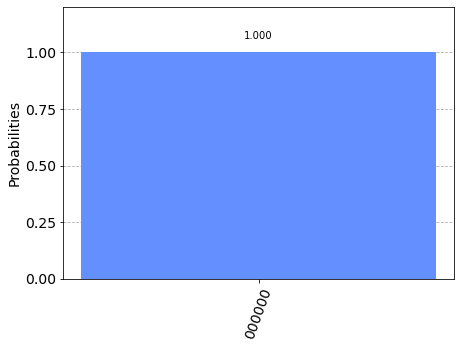

In [7]:
sim = Aer.get_backend('qasm_simulator')  # qasm simulator is one of the many simulators
qobj = assemble(qc_output)  # we are turning the circuit into an object so that the backend can run it
result = sim.run(qobj).result()  # the exp is run and we obtain the result in the variable result
# counts is a dictionary containing the number of times each result appeared

counts = result.get_counts()
# we now display it on a histogram

plot_histogram(counts)

In [12]:
qc_encode = QuantumCircuit(no)
qc_encode.x(3)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
q_4: ─────
          
q_5: ─────

In [13]:
qc = qc_encode + qc_output
qc.draw()

┌─┐            
q_0: ─────┤M├────────────
          └╥┘┌─┐         
q_1: ──────╫─┤M├─────────
           ║ └╥┘┌─┐      
q_2: ──────╫──╫─┤M├──────
     ┌───┐ ║  ║ └╥┘   ┌─┐
q_3: ┤ X ├─╫──╫──╫────┤M├
     └┬─┬┘ ║  ║  ║    └╥┘
q_4: ─┤M├──╫──╫──╫─────╫─
      └╥┘  ║  ║  ║ ┌─┐ ║ 
q_5: ──╫───╫──╫──╫─┤M├─╫─
       ║   ║  ║  ║ └╥┘ ║ 
c: 6/══╩═══╩══╩══╩══╩══╩═
       4   0  1  2  5  3

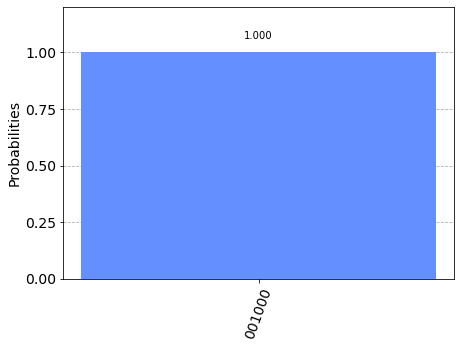

In [14]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [17]:
qc_cnot = QuantumCircuit(5)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────

In [20]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

In [22]:
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [23]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

ModuleNotFoundError: No module named 'qiskit_textbook'

In [25]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

In [27]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

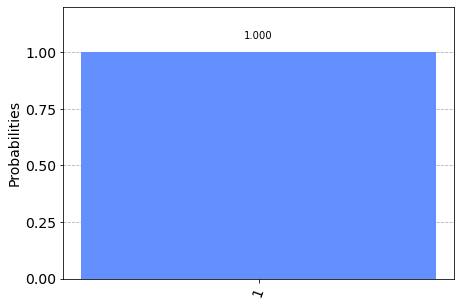

In [28]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector